# Detecting Fraudulant Credit Card Use with Machine Learning

In this project I will be using a dataset obtained from kaggle (link below) of features relating to credit card usage. Credit Card fraud is an issue that has existed since the advent of credit card. What goes on behind the text message you recieve when the bank is confirming whether it is you or not? This project explores that application. A dataset on consumer transaction data with a number of different features (PCA transformed to protect the identity of consumers) will be used to train a few different types of machine learning algorithms from sci-kit learn using Python to build a classification model to classify credit-card transactions as either valid or fraudulant cases. 

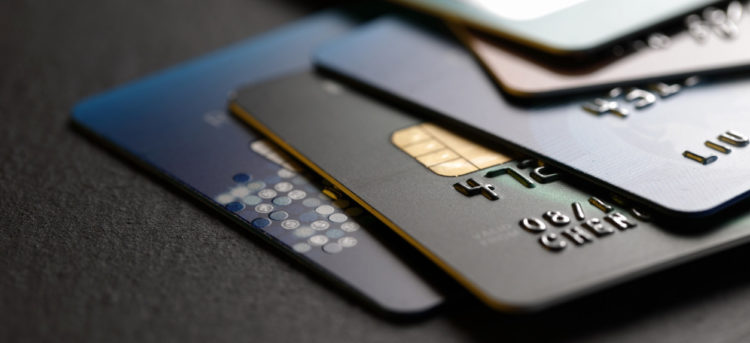

The models that will be tested are Logistic Regression, Naive Bayes, Random Forest, and SVM. I will briefly describe how each model works as I implement them. Then the runtime and scores will also be analyzed to select the best performing classfication model for this use case. 

### How does credit card fraud occur? ###
- Your details are seen by other people.
- Your card is lost or stolen.
- Phishing scams that convince you for sensitive information.
- Hacking bank accounts. 


### Main Challenges with Credit Card Fraud Detection: ###
- Enormous Data -> The model must be fast as it will be dealing with huge amounts of data and must be able to detect the scam in time.
- Imbalanced Data -> A very small number of transactions are fraudulant so it will be difficult to detect every single fraudulant case.
- Data Availability -> Data is private and the features are obscured. 
- Misclassified Data -> Not every fraudulent transaction is caught and reported. 


The dataset can be found at this [link](https://drive.google.com/file/d/1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ/view): 

I have it downloaded in another directory so I will load it from there. If you are trying to follow along on this project make sure to change the path accordingly!

### Importing dependencies

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import time

### Loading the data

In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\Gurpal\Desktop\Repos\Datasets\creditcard.csv')
print('Data Loaded Successfully...')

Data Loaded Successfully...


Printing out the data to see what it looks like. 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape)

(284807, 31)


From above we can see this dataset is quite large. There are 284,807 rows and 31 columns (features). The features of the dataset have been transformed using a PCA transformation to protect sensitve information about users. The features time, amount, and class have not been transformed. 

Time - The number of seconds elapsed between this transaction and first transaction in dataset.

Amount - Transaction amount.

Class - 1 if fraudulent, 0 otherwise.

Looking at the summary of statistics for the dataset. 

In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Statistics and Histograms
Using seaborn to plot histograms of all of the features. Fraud cases in blue and valid cases in orange. 

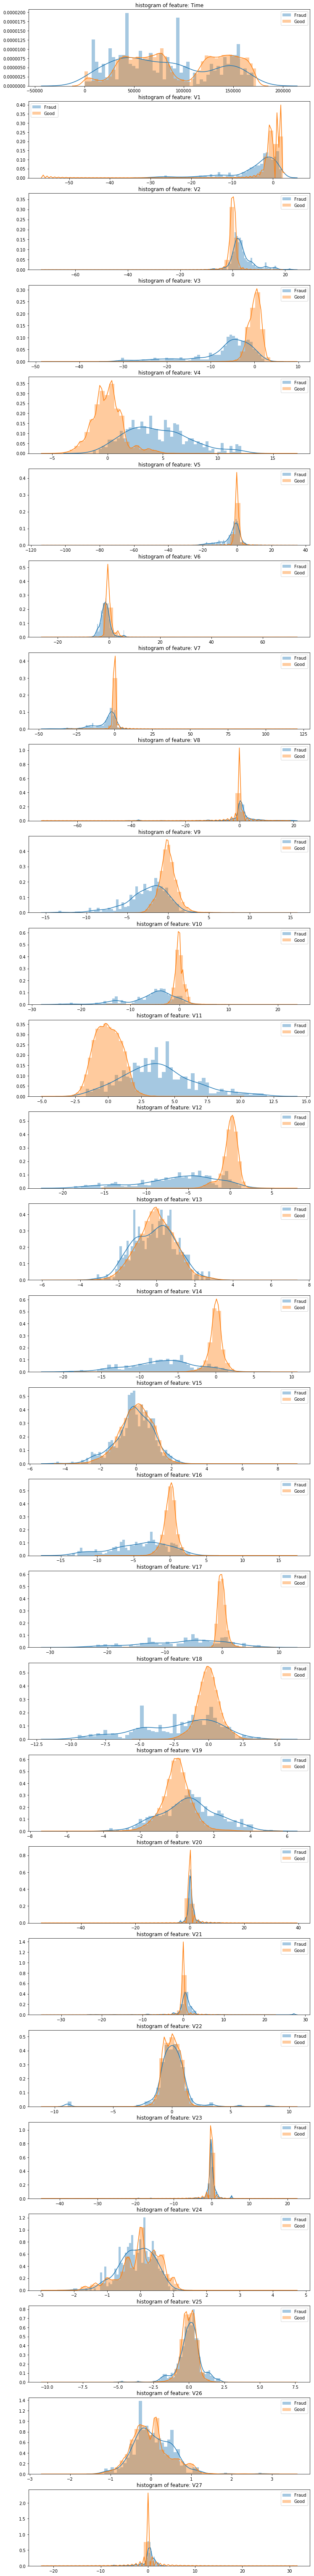

In [6]:
features = data.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)

for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class==1], bins = 50, label = 'Fraud')
    sns.distplot(data[c][data.Class==0], bins = 50, label = 'Good')
    ax.set_xlabel('')
    ax.legend()
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [7]:
# Number of Fraud cases in total dataseet

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

len_fraud = len(Fraud)
len_valid = len(Valid)

fraction_fraud = len_fraud / (len_fraud + len_valid) 
print('Fraction Fraud: ' + str(round(fraction_fraud,6)))
print('Number of Total Cases: ' + str(len_fraud+len_valid))
print('Number of Fraud Cases: ' + str(len_fraud))
print('Number of Valid Cases: ' + str(len_valid))

Fraction Fraud: 0.001727
Number of Total Cases: 284807
Number of Fraud Cases: 492
Number of Valid Cases: 284315


There are only 0.17% fraudulent cases in the whole dataset. This means the data is unbalanced and we may have to balance it if the models don't render good accuracy.

In [8]:
# Lets look at statistcs of Amount for fraud cases 
print('Statistics for Fraud Cases Data: ')
print(Fraud.Amount.describe())

Statistics for Fraud Cases Data: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
# Lets look at statistics of Amount for Valid cases
print(Valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


The average amount for fraud cases is noticiably higher that that of valid cases. 

# Correlation Matrix

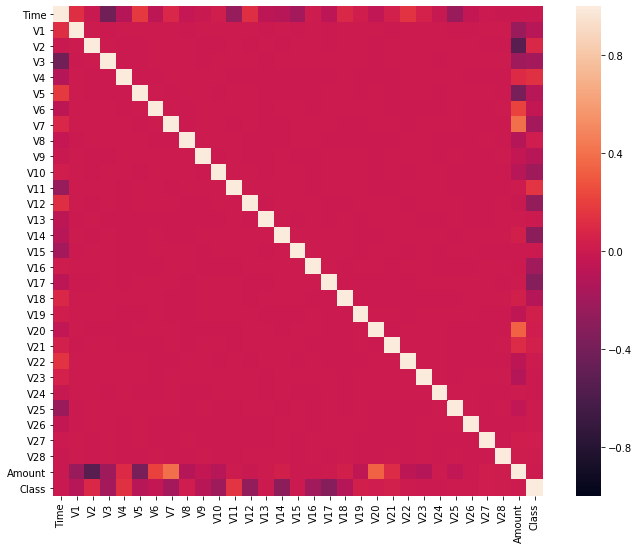

In [10]:
# Creating Correlation matrix

cm = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(cm, vmax = 1,vmin= -1, square = True)
plt.show()

The correlation matrix shows us which features are related to eachother and may have strong correlations. From observation the features V2, V5, and V1 have the strongest negative correlation with the "Amount" feature. The features V17, V14, V12, V10 are the strongest negatively correlated with the "Class" feature. 

## Preparing Data for Training

In [11]:
# Dividing the X and Y data

# X data
X = data.drop(['Class'], axis = 1)

# Y data
Y = data['Class']

In [12]:
print(X.head())
print(Y.head())

print('X data shape: ' + str(X.shape))
print('Y data shape: ' + str(Y.shape))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [13]:
# Converting into numpy arrays
X_data = X.values
Y_data = Y.values

In [14]:
# Splitting the data into test and training set
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

## Logistic Regression Classification Model

The logistic regression model is useful for modeling the probability of a binary problem. In this case the prediction can be either valid or fraud. So, it will fit our use case. The logistic regrssion model is based on the sigmoid function and the value of the dependent variable takes on a value of 0 or 1 making it ideal for a binary classification problem. If you want to learn more about how the algorithm works and the math behind it you can start [here](https://en.wikipedia.org/wiki/Logistic_regression).

In [15]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Timer start 
start = time.time()

# Logistic Regression Model Created 
logreg = LogisticRegression()

# Logitic Regression Model Fitted
logreg.fit(X_train, Y_train)

# Prediction
y_pred_logreg = logreg.predict(X_test) 

# Timer end 
end = time.time()

total_time_logreg = (end-start)
print('Logistic Regression Runtime: {:.4f} seconds'.format(total_time_logreg))

print('Logistic Regression Model Created')

C:\Users\Gurpal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Runtime: 9.2123 seconds
Logistic Regression Model Created


In [16]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

from sklearn.metrics import confusion_matrix

print('Logistic Regression Classifier Scores: ')

# Calculate accuracy score
acc_logreg = accuracy_score(Y_test, y_pred_logreg)
print('Accuracy Score: {}'.format(acc_logreg))

# Calculate precision score
prec_logreg = precision_score(Y_test, y_pred_logreg)
print('Precision Score: {}'.format(prec_logreg))

# Calculate recall score
rec_logreg = recall_score(Y_test, y_pred_logreg)
print('Recall Score: {}'.format(rec_logreg))

# Calculate f1 score
f1_logreg = f1_score(Y_test, y_pred_logreg)
print('F1 Score: {}'.format(f1_logreg))

# Calculate mathews correlation coefficient 
mcc_logreg = matthews_corrcoef(Y_test, y_pred_logreg)
print('Matthews Correlation Coefficient: {}'.format(mcc_logreg))

Logistic Regression Classifier Scores: 
Accuracy Score: 0.9989993328885924
Precision Score: 0.8253968253968254
Recall Score: 0.5306122448979592
F1 Score: 0.6459627329192548
Matthews Correlation Coefficient: 0.6613449759956226


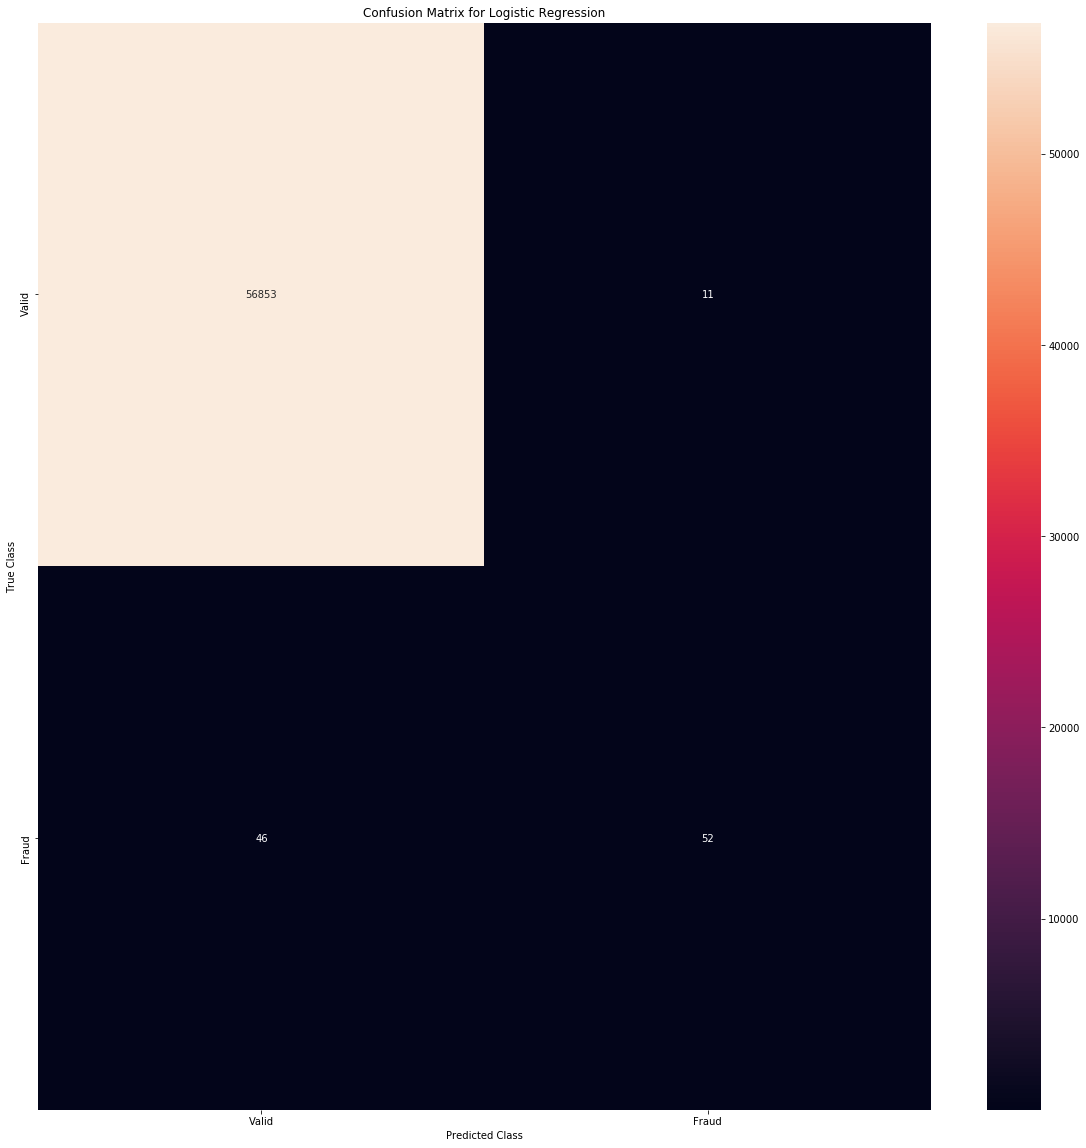

In [17]:
# Visualizing the Confusion Matrix for Logistic Regression Model

labels = ['Valid', 'Fraud']

# Creating confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_logreg)
plt.figure(figsize = (20,20))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [18]:
# Building random forest classification model

from sklearn.ensemble import RandomForestClassifier

# Timer start
start = time.time()

# Creating random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Calculating predictions 
y_pred_rfc = rfc.predict(X_test)

# Timer end 
end = time.time()

# Calc total time 
total_time_rfc = (end-start)
print('Random Forest Classifier Runtime: {:.4f} seconds'.format(total_time_rfc))

print('Random Forest Model Created')

C:\Users\Gurpal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Runtime: 39.0527 seconds
Random Forest Model Created


In [19]:
# Evaluating Random Forest Classification Model


print('Random Forest Classifier: ')

# Calculate accuracy score
acc_rfc = accuracy_score(Y_test, y_pred_rfc)
print('Accuracy Score: {}'.format(acc_rfc))

# Calculate precision score
prec_rfc = precision_score(Y_test, y_pred_rfc)
print('Precision Score: {}'.format(prec_rfc))

# Calculate recall score
rec_rfc = recall_score(Y_test, y_pred_rfc)
print('Recall Score: {}'.format(rec_rfc))

# Calculate f1 score
f1_rfc = f1_score(Y_test, y_pred_rfc)
print('F1 Score: {}'.format(f1_rfc))

# Calculate mathews correlation coefficient 
mcc_rfc = matthews_corrcoef(Y_test, y_pred_rfc)
print('Matthews Correlation Coefficient: {}'.format(mcc_rfc))

Random Forest Classifier: 
Accuracy Score: 0.9994557775359011
Precision Score: 0.935064935064935
Recall Score: 0.7346938775510204
F1 Score: 0.822857142857143
Matthews Correlation Coefficient: 0.8285942931646451


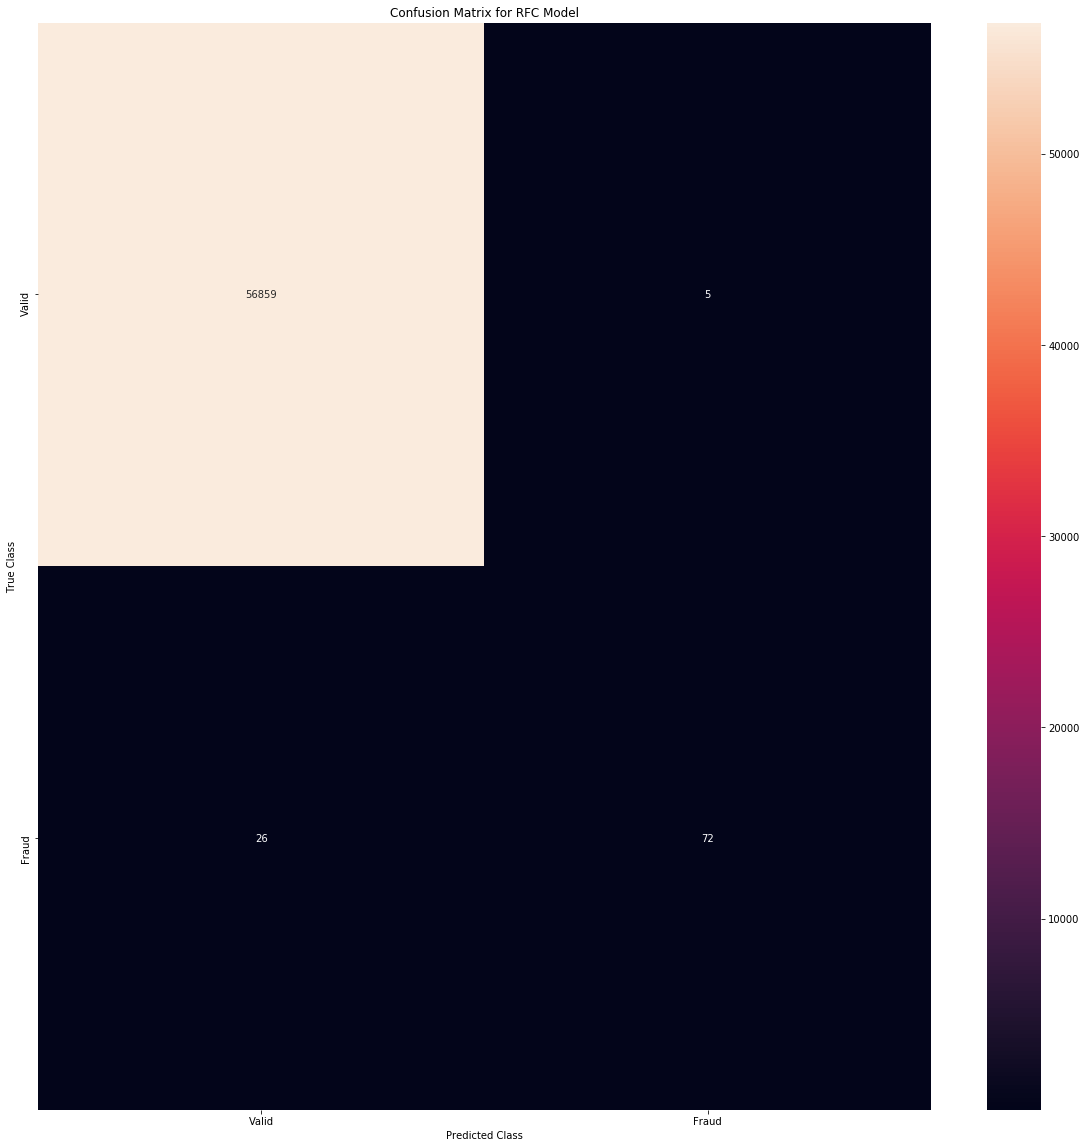

In [20]:
# Visualizing the Confusion Matrix

labels = ['Valid', 'Fraud']

# Creating confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)
plt.figure(figsize = (20,20))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('Confusion Matrix for RFC Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [21]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Timer start
start = time.time()

# Create Naive Bayes Model
nb_model = GaussianNB()

# Fit Naive Bayes Model
nb_model.fit(X_train, Y_train) 

# Make prediction
y_pred_nb = nb_model.predict(X_test) 

# Timer end 
end = time.time()

# 
total_time_nb = (end-start)
print('Logistic Regression Runtime: {:.4f} seconds'.format(total_time_nb))

print('Naive Bayes Model Created...')

Logistic Regression Runtime: 0.4321 seconds
Naive Bayes Model Created...


In [22]:
print('Naive Bayes Classifier: ')

# Calculate accuracy score
acc_nb = accuracy_score(Y_test, y_pred_nb)
print('Accuracy Score: {}'.format(acc_nb))

# Calculate precision score
prec_nb = precision_score(Y_test, y_pred_nb)
print('Precision Score: {}'.format(prec_nb))

# Calculate recall score
rec_nb = recall_score(Y_test, y_pred_nb)
print('Recall Score: {}'.format(rec_nb))

# Calculate f1 score
f1_nb = f1_score(Y_test, y_pred_nb)
print('F1 Score: {}'.format(f1_nb))

# Calculate mathews correlation coefficient 
mcc_nb = matthews_corrcoef(Y_test, y_pred_nb)
print('Matthews Correlation Coefficient: {}'.format(mcc_nb))


Naive Bayes Classifier: 
Accuracy Score: 0.9930128857835048
Precision Score: 0.14622641509433962
Recall Score: 0.6326530612244898
F1 Score: 0.2375478927203065
Matthews Correlation Coefficient: 0.3019617859258202


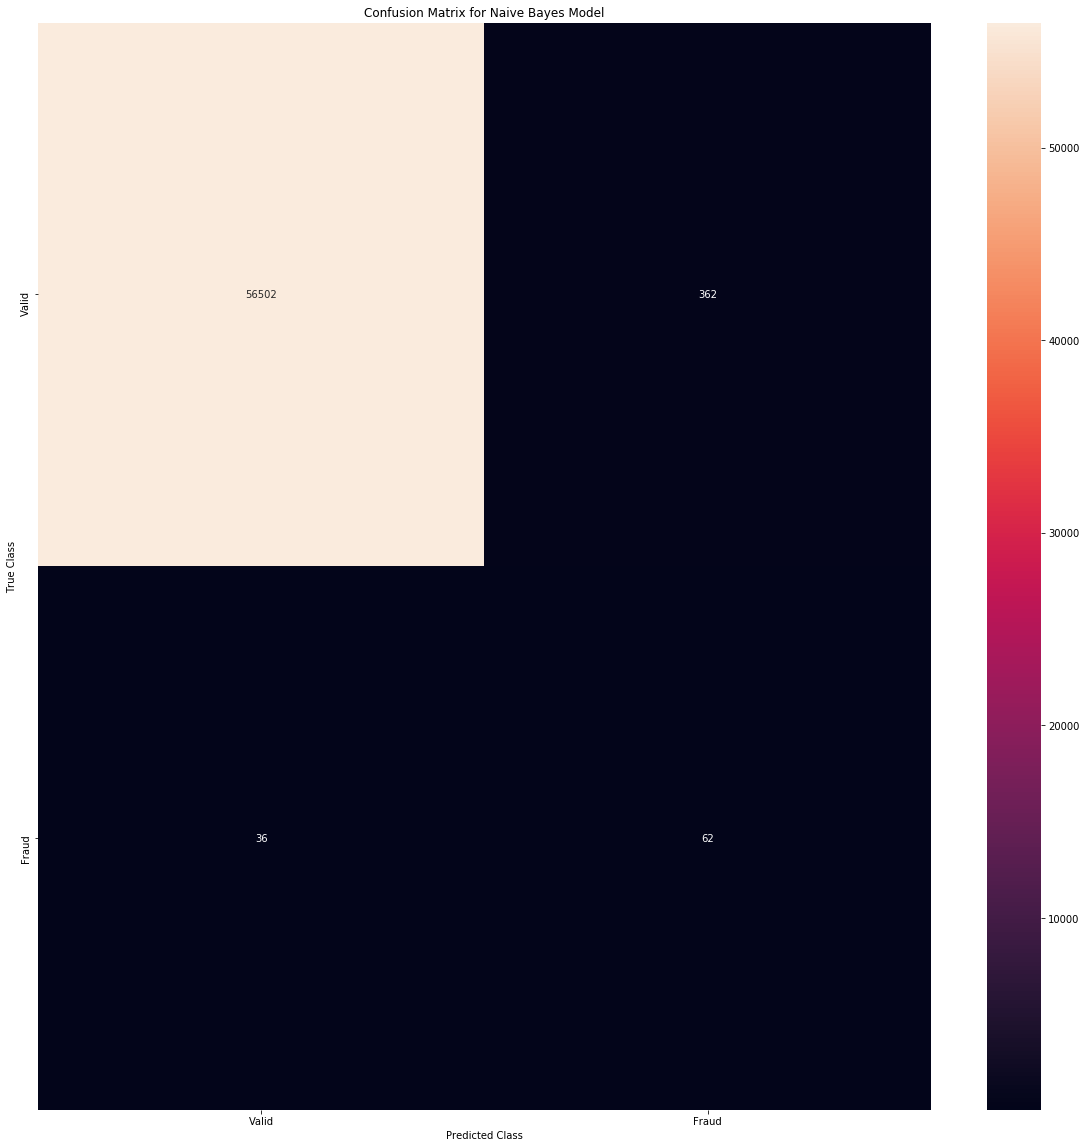

In [23]:
# Visualizing the Confusion Matrix

labels = ['Valid', 'Fraud']

# Creating confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (20,20))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [24]:
# SVM model
from sklearn import svm

# Timer start
start = time.time()

# Create Linear kernal SVM model
svm_clf = svm.SVC(kernel='linear')

# Fit SVM model
svm_clf.fit(X_train, Y_train) 

# Prediction 

y_pred_svm = svm_clf.predict(X_test) 

# Timer end 
end = time.time()

# Calc Runtime
total_time_svm = (end-start)
print('SVM Runtime: {:.4f} seconds'.format(total_time_svm))

print('SVM Model Created...')

SVM Runtime: 1150.9431 seconds
SVM Model Created...


In [25]:
print('Support Vector Machine Classifier: ')

# Calculate accuracy score
acc_svm = accuracy_score(Y_test, y_pred_svm)
print('Accuracy Score: {}'.format(acc_svm))

# Calculate precision score
prec_svm = precision_score(Y_test, y_pred_svm)
print('Precision Score: {}'.format(prec_svm))

# Calculate recall score
rec_svm = recall_score(Y_test, y_pred_svm)
print('Recall Score: {}'.format(rec_svm))

# Calculate f1 score
f1_svm = f1_score(Y_test, y_pred_svm)
print('F1 Score: {}'.format(f1_svm))

# Calculate mathews correlation coefficient 
mcc_svm = matthews_corrcoef(Y_test, y_pred_svm)
print('Matthews Correlation Coefficient: {}'.format(mcc_svm))

Support Vector Machine Classifier: 
Accuracy Score: 0.9984551104244935
Precision Score: 0.6041666666666666
Recall Score: 0.29591836734693877
F1 Score: 0.3972602739726027
Matthews Correlation Coefficient: 0.4221655953416209


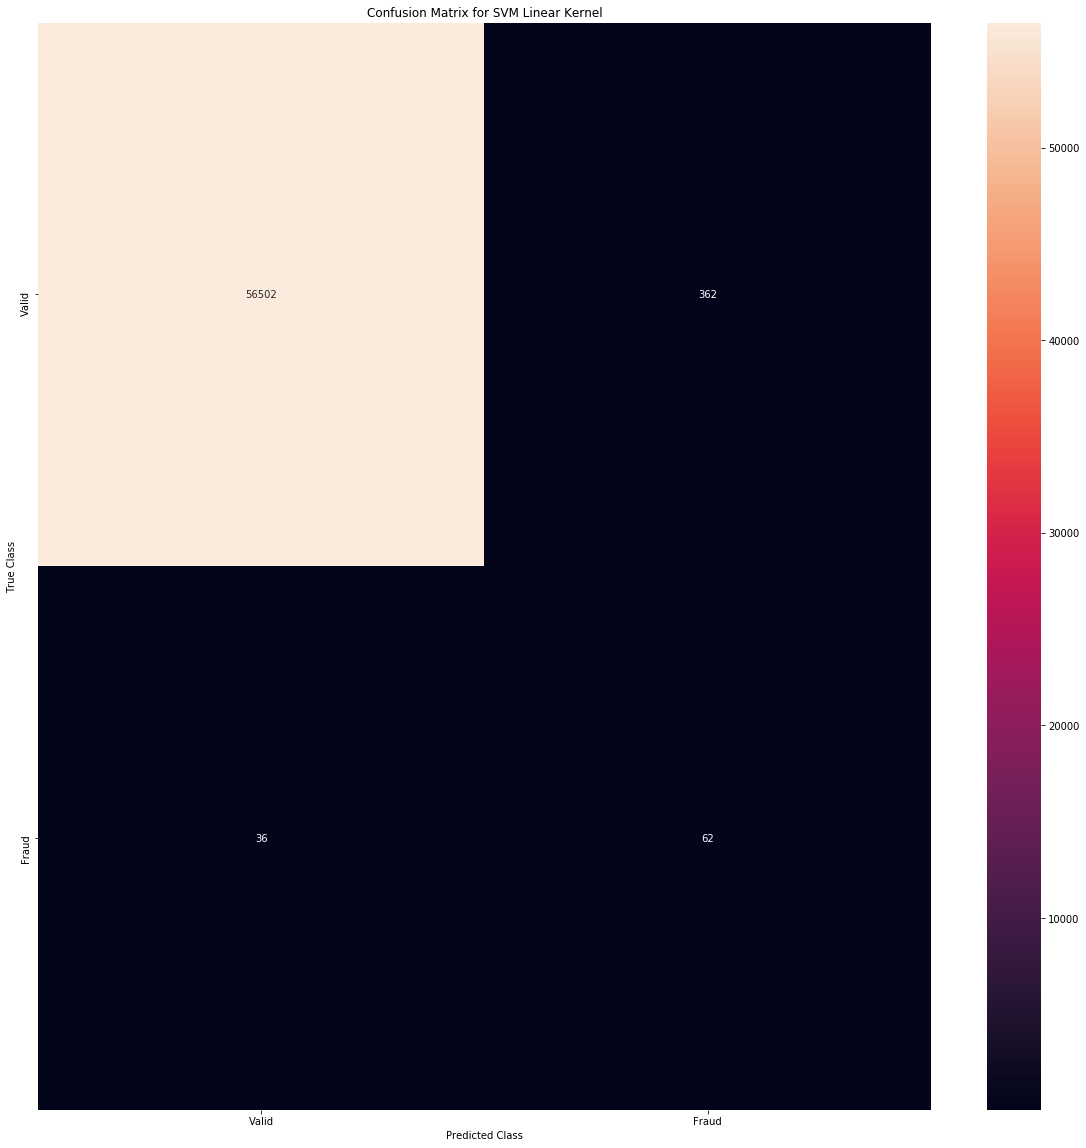

In [26]:
# Visualizing the Confusion Matrix

labels = ['Valid', 'Fraud']

# Creating confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (20,20))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title('Confusion Matrix for SVM Linear Kernel')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [27]:
print(total_time_logreg)
print(total_time_nb)
print(total_time_rfc)
print(total_time_svm)

9.21232795715332
0.4320688247680664
39.05269265174866
1150.9430720806122


In [28]:
# Putting data into dataframe so it is easier to visualize
algo_data = {'Algorithm':['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM'],
             'Runtime':[total_time_logreg,total_time_nb, total_time_rfc, total_time_svm],
             'Accuracy_Score':[acc_logreg, acc_nb, acc_rfc, acc_svm],
             'Precision_Score':[prec_logreg, prec_nb, prec_rfc, prec_svm],
             'Recall_Score':[rec_logreg, rec_nb, rec_rfc, rec_svm],
             'F1_Score':[f1_logreg, f1_nb, f1_rfc, f1_svm,],
             'MCC':[mcc_logreg, mcc_nb, mcc_rfc, mcc_svm]}

algo_df = pd.DataFrame(algo_data)

In [29]:
algo_df

,Algo,Runtime,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,MCC
0,Logistic Regression,9.212328,0.998999,0.825397,0.530612,0.645963,0.661345
1,Naive Bayes,0.432069,0.993013,0.146226,0.632653,0.237548,0.301962
2,Random Forest,39.052693,0.999456,0.935065,0.734694,0.822857,0.828594
3,SVM,1150.943072,0.998455,0.604167,0.295918,0.397260,0.422166


In [30]:
# Save to csv to make for plottting purposes #
### This will be removed ###

algo_df.to_csv('algo_data.csv')

,Algo,Runtime,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,MCC
0,Logistic Regression,9.212328,0.998999,0.825397,0.530612,0.645963,0.661345
1,Naive Bayes,0.432069,0.993013,0.146226,0.632653,0.237548,0.301962
2,Random Forest,39.052693,0.999456,0.935065,0.734694,0.822857,0.828594
3,SVM,1150.943072,0.998455,0.604167,0.295918,0.397260,0.422166


Logistic Regression: 9.21 seconds
Naive Bayes: 0.43 seconds
Random Forest: 39.05 seconds
SVM: 1150.94 seconds


***** Algorithm Runtimes *****
Logistic Regression: 9.21 seconds
Naive Bayes: 0.43 seconds
Random Forest: 39.05 seconds
SVM: 1150.94 seconds


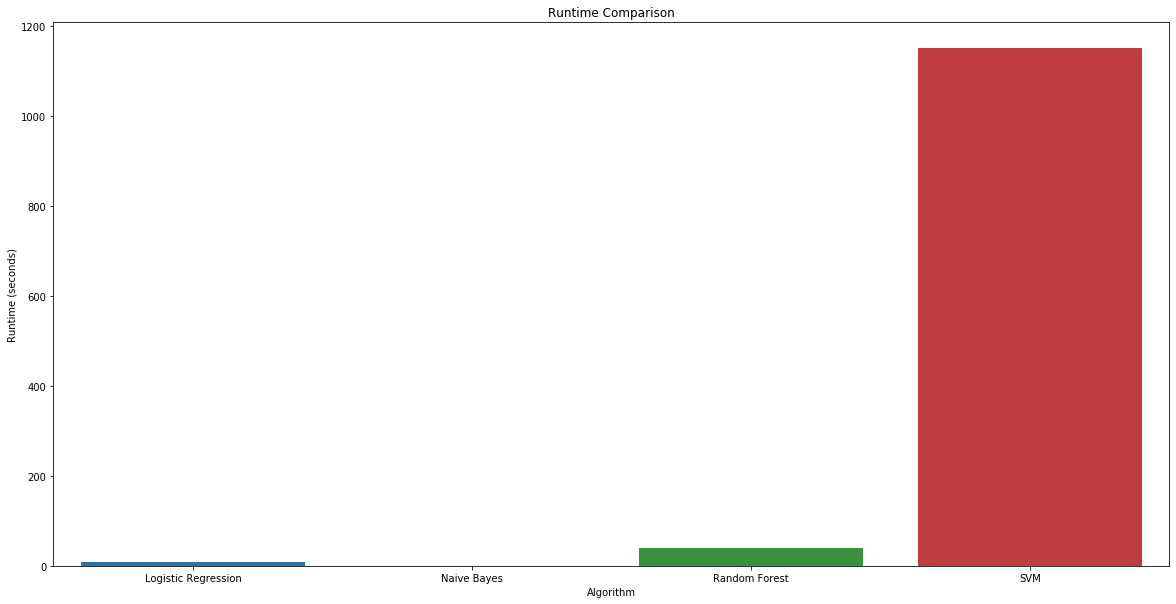

In [63]:
# Printing Runtimes
print('***** Algorithm Runtimes *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['Runtime'], 2)) + ' seconds')

# Plotting Runtime
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='Runtime', data = algo_df)
plt.ylabel('Runtime (seconds)')
plt.xlabel('Algorithm')
plt.title('Runtime Comparison')
plt.show()

***** Algorithm Accuracy *****
Logistic Regression: 0.999
Naive Bayes: 0.993
Random Forest: 0.9995
SVM: 0.9985


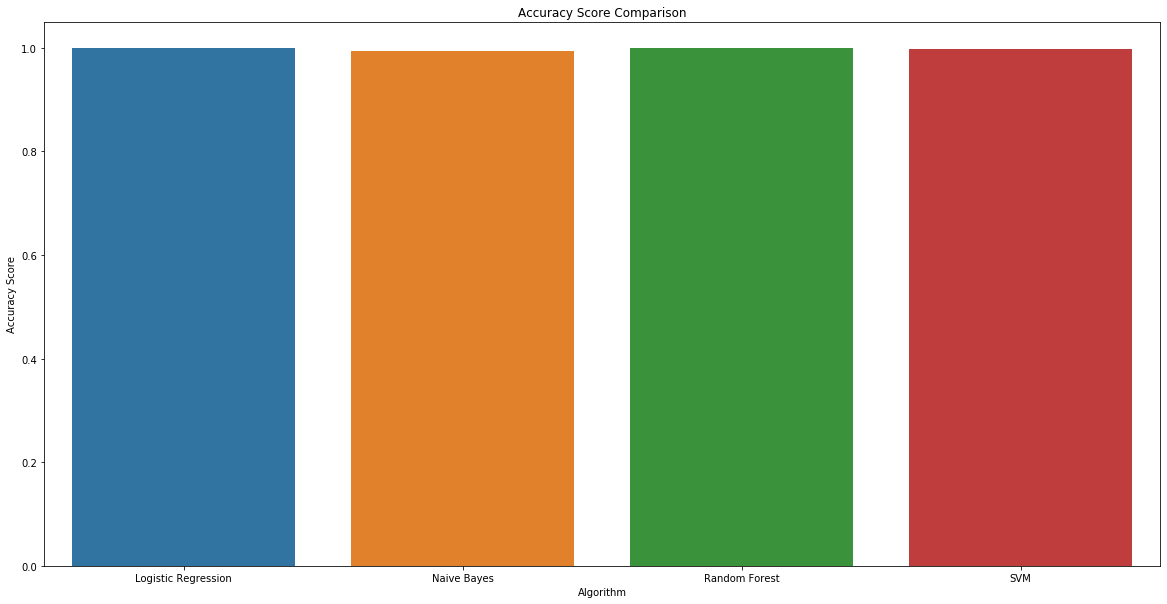

In [65]:
# Printing Runtimes
print('***** Algorithm Accuracy *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['Accuracy_Score'], 4)))


# Plotting Accuracy Score
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='Accuracy_Score', data = algo_df)
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithm')
plt.title('Accuracy Score Comparison')
plt.show()

***** Algorithm Precision *****
Logistic Regression: 0.8254
Naive Bayes: 0.1462
Random Forest: 0.9351
SVM: 0.6042


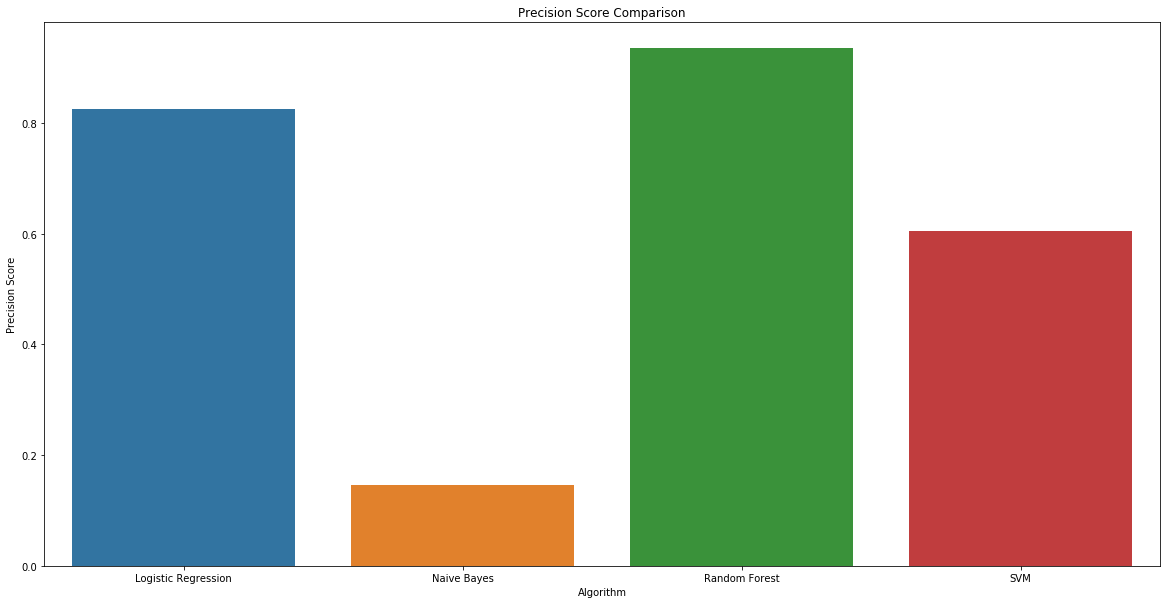

In [66]:
# Printing Precision Score
print('***** Algorithm Precision *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['Precision_Score'], 4)))


# Plotting Precision Score
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='Precision_Score', data = algo_df)
plt.ylabel('Precision Score')
plt.xlabel('Algorithm')
plt.title('Precision Score Comparison')
plt.show()

***** Algorithm Recall Score *****
Logistic Regression: 0.5306
Naive Bayes: 0.6327
Random Forest: 0.7347
SVM: 0.2959


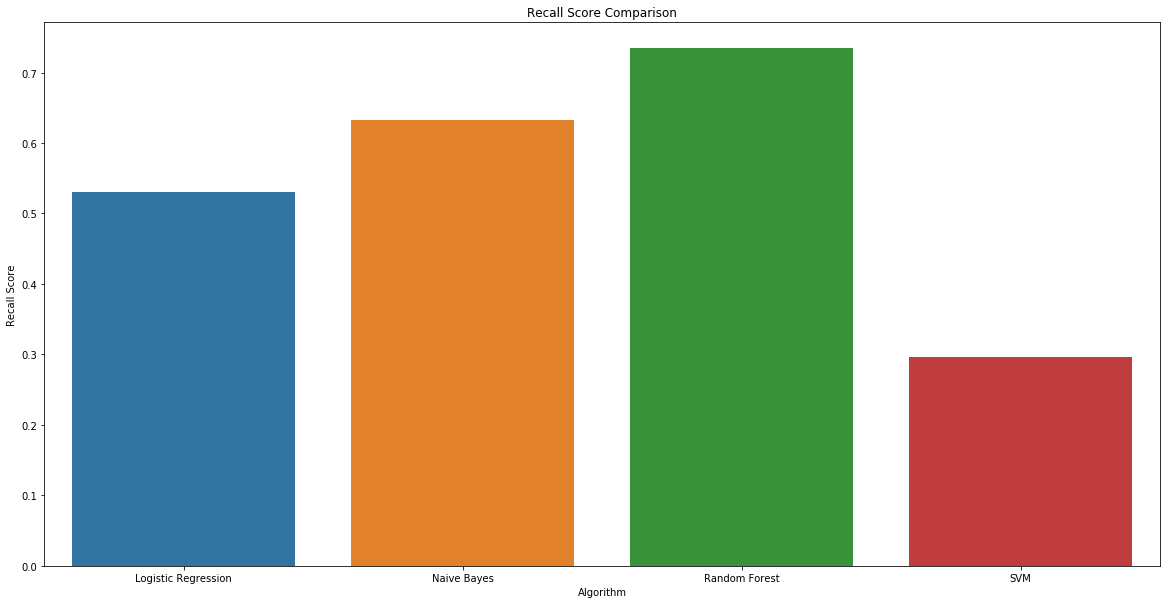

In [67]:
# Printing Precision Score
print('***** Algorithm Recall Score *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['Recall_Score'], 4)))


# Plotting Precision Score
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='Recall_Score', data = algo_df)
plt.ylabel('Recall Score')
plt.xlabel('Algorithm')
plt.title('Recall Score Comparison')
plt.show()

***** Algorithm F1 Score *****
Logistic Regression: 0.646
Naive Bayes: 0.2375
Random Forest: 0.8229
SVM: 0.3973


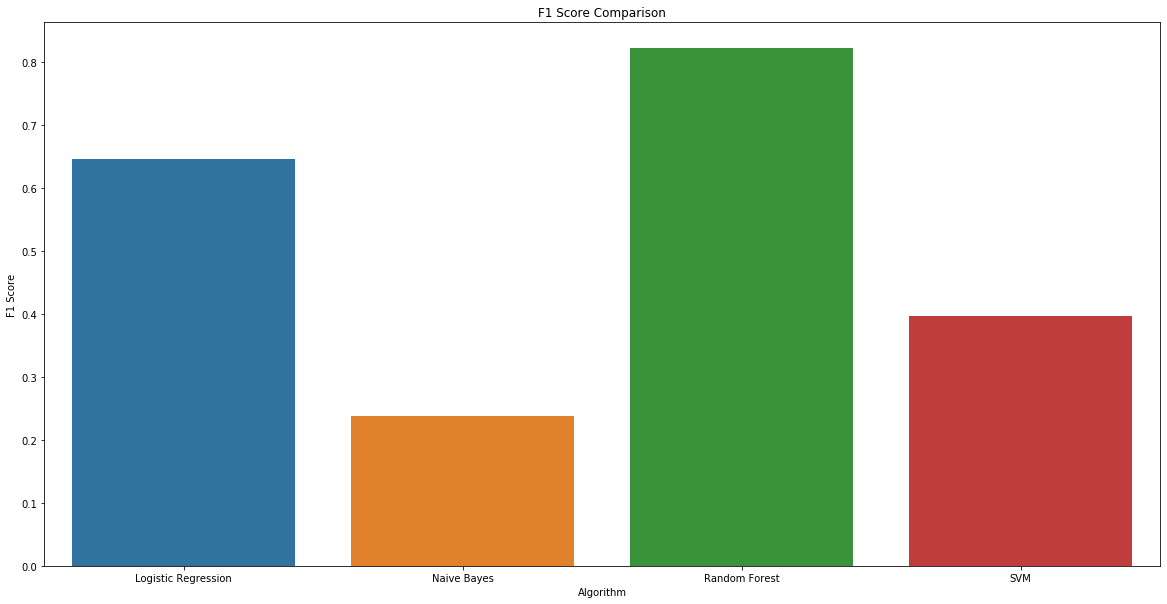

In [68]:
# Printing Precision Score
print('***** Algorithm F1 Score *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['F1_Score'], 4)))


# Plotting Precision Score
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='F1_Score', data = algo_df)
plt.ylabel('F1 Score')
plt.xlabel('Algorithm')
plt.title('F1 Score Comparison')
plt.show()

***** Algorithm Matthews Correlation Coefficient *****
Logistic Regression: 0.6613
Naive Bayes: 0.302
Random Forest: 0.8286
SVM: 0.4222


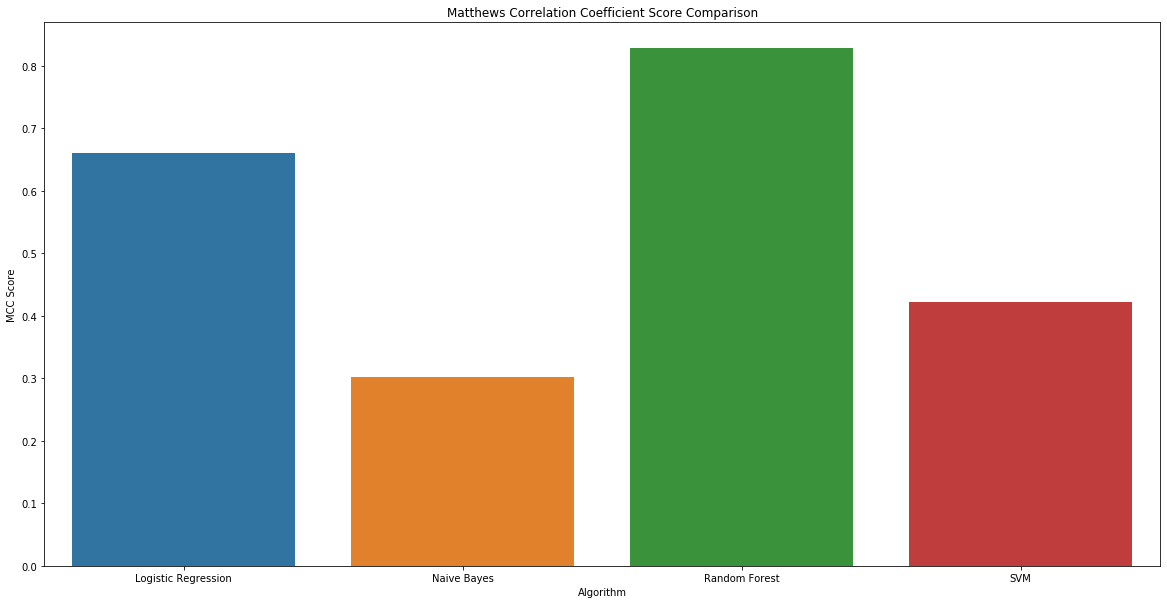

In [70]:
# Printing Precision Score
print('***** Algorithm Matthews Correlation Coefficient *****')
for i in range(algo_df.shape[0]):
    print(algo_df.iloc[i]['Algo'] + ': ' + str(round(algo_df.iloc[i]['MCC'], 4)))


# Plotting Precision Score
plt.figure(figsize = (20,10))
sns.barplot(x='Algo', y='MCC', data = algo_df)
plt.ylabel('MCC Score')
plt.xlabel('Algorithm')
plt.title('Matthews Correlation Coefficient Score Comparison')
plt.show()